In [2]:
import geopandas as gpd
import pandas as pd

adressen_gdf = gpd.read_file("raw_data/ows.gml")

In [6]:
adressen_gdf

,gml_id,nr,str_nr,laenge,geometry
0,strassenabschnitte_wu.1,100,2255.0,169.651981,"MULTILINESTRING ((689218.762 5343300.376, 6892..."
1,strassenabschnitte_wu.2,100,1272.0,97.883271,"MULTILINESTRING ((689197.536 5343113.446, 6890..."
2,strassenabschnitte_wu.3,100,308.0,111.443894,"MULTILINESTRING ((689125.003 5343191.994, 6891..."
3,strassenabschnitte_wu.4,100,5285.0,111.888482,"MULTILINESTRING ((689055.967 5343192.173, 6890..."
4,strassenabschnitte_wu.5,400,537.0,69.036432,"MULTILINESTRING ((689125.003 5343191.994, 6890..."
...,...,...,...,...,...
22432,strassenabschnitte_wu.22433,100,4570.0,55.482162,"MULTILINESTRING ((693949.394 5337178.945, 6939..."
22433,strassenabschnitte_wu.22434,600,619.0,84.592157,"MULTILINESTRING ((694297.012 5335588.716, 6943..."
22434,strassenabschnitte_wu.22435,100,5737.0,79.614754,"MULTILINESTRING ((698595.398 5332619.048, 6986..."
22435,strassenabschnitte_wu.22436,800,6707.0,35.448181,"MULTILINESTRING ((679065.113 5336356.274, 6790..."


<Axes: >

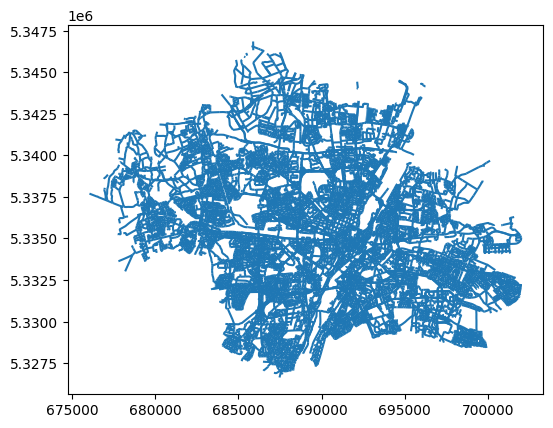

In [3]:
adressen_gdf.plot()

In [4]:
len(adressen_gdf)

22437

In [12]:
dissolved_adressen_gdf = adressen_gdf.dissolve(by="str_nr")

In [13]:
dissolved_adressen_gdf.geometry.length

str_nr
0.0        22532.881037
1.0          174.791833
2.0          701.266972
3.0          110.982503
4.0          358.813938
               ...     
30033.0      268.832979
30035.0      497.781888
30043.0      157.636087
40008.0       90.497825
90004.0      151.126201
Length: 6143, dtype: float64

In [14]:
len(dissolved_adressen_gdf)

6143

In [16]:
dissolved_adressen_gdf["laenge"] = dissolved_adressen_gdf.geometry.length

In [17]:
dissolved_adressen_gdf.sort_values(by="laenge", ascending=False).head(10)

,geometry,gml_id,nr,laenge
str_nr,,,,
7003.0,"MULTILINESTRING ((686243.12 5330598.279, 68622...",strassenabschnitte_wu.658,100,37246.684776
0.0,"MULTILINESTRING ((696652.759 5338508.83, 69665...",strassenabschnitte_wu.91,33,22532.881037
797.0,"MULTILINESTRING ((690242.92 5336239.553, 69024...",strassenabschnitte_wu.795,903,19705.708937
4166.0,"MULTILINESTRING ((690417.552 5342683.97, 69041...",strassenabschnitte_wu.675,4853,14158.416756
2690.0,"MULTILINESTRING ((687365.963 5335080.632, 6872...",strassenabschnitte_wu.2190,1000,13752.935779
2694.0,"MULTILINESTRING ((688791.082 5339324.934, 6887...",strassenabschnitte_wu.641,4400,13068.731376
1376.0,"MULTILINESTRING ((686211.123 5335120.858, 6862...",strassenabschnitte_wu.796,703,11239.526237
4673.0,"MULTILINESTRING ((693214.99 5329099.366, 69319...",strassenabschnitte_wu.2451,4100,10890.674817
4505.0,"MULTILINESTRING ((696293.522 5331529.352, 6963...",strassenabschnitte_wu.2017,1900,9295.938996


# Längste Straße
Str Nr 0 & 7003 scheinen Platzhalter für unbenannte Straßen zu sein

Gesamtlänge ensteht auch durch mehrere Fahrspuren, die mit einberechnet wurden.

797 - Dachauer Straße (Straße zum Schloss Dachau)
4166 - Schleißheimer Str.
2690 - Landsberger Str. (Entlang der Bahnschinen südlich parallel zum Bahnkörper München Hauptbahnhof–München-Pasing / benannant nach Landsberg am Lech)
Landsberger Allee in Berlin ist anch Altlandsberg im Landkreis Märkisch-Oderland in Brandenburg.
2694 - Landshuter Allee (sehr breite Allee, Von 1858 bis 1892 verlief auf der heutigen Landshuter Allee die eingleisige Bahnstrecke von München nach Landshut.)

In [18]:
dissolved_adressen_gdf.sort_values(by="laenge", ascending=True).head(10)

,geometry,gml_id,nr,laenge
str_nr,,,,
20106.0,"LINESTRING (692573.253 5333984.348, 692586.036...",strassenabschnitte_wu.9219,100,13.726102
20012.0,"LINESTRING (693456.564 5337201.661, 693466.946...",strassenabschnitte_wu.11122,100,13.760005
1950.0,"LINESTRING (683800.173 5340162.234, 683812.278...",strassenabschnitte_wu.3849,100,14.515148
1736.0,"LINESTRING (697103.637 5338563.719, 697102.978...",strassenabschnitte_wu.22209,100,16.256934
6233.0,"LINESTRING (693143.591 5336226.907, 693129.52 ...",strassenabschnitte_wu.21748,100,16.605461
5842.0,"LINESTRING (694757.558 5337629.381, 694763.884...",strassenabschnitte_wu.2704,50,18.111941
3650.0,"LINESTRING (688424.646 5335825.185, 688412.392...",strassenabschnitte_wu.5499,100,18.455416
2455.0,"LINESTRING (692353.706 5336971.154, 692370.147...",strassenabschnitte_wu.9004,100,19.663006
6356.0,"LINESTRING (691201.928 5337600.699, 691201.589...",strassenabschnitte_wu.788,100,19.988660


# Kurze Straße
20106 / 20012 ohne Adressen
- Hertwirgplatz (benannt nach dem Zoologen Richard von HertwigW.) https://www.muenchenwiki.de/wiki/Hertwigplatz
- Hagebuttenplatz
